# Coursework
## Programming in Python for Business Analytics
#### Group 19

#### Data Preparation

The Acme Corporation must complete a task every day; these can be e.g. deliveries of goods, project management tasks, or recruitment of staff. **For completing each task, Acme must choose one out of sixty-four (64) suppliers** that provide the resources required to complete the task. The final cost of the task depends on how effective the chosen supplier is at performing the particular task. Unfortunately, estimating this cost in advance requires significant resources. Acme has hired your Business Analytics firm to develop a machine learning (ML) approach for **selecting suppliers given a new task**.

In [3]:
# Libraries:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import copy
import random

In [4]:
# Import datasets
# Change route for each of us:
tasks = pd.read_csv('/Users/alexander/Documents/MSc Data Science/Python/Coursework/Copia de PythonCoursework/data/tasks.csv')
suppliers = pd.read_csv('/Users/alexander/Documents/MSc Data Science/Python/Coursework/Copia de PythonCoursework/data/suppliers.csv')
cost = pd.read_csv('/Users/alexander/Documents/MSc Data Science/Python/Coursework/Copia de PythonCoursework/data/cost.csv.zip')

### 1. General exploration of data

In [8]:
# Tasks dataset:
tasks.head()

,Task ID,TF1,TF2,TF3,TF4,TF5,TF6,TF7,TF8,TF9,...,TF107,TF108,TF109,TF110,TF111,TF112,TF113,TF114,TF115,TF116
0,T1,332,5123,647174452,2111,41.2063244192855%,140069227,22%,1438,0.280695,...,50,0,93828.91,759621.99,12264068,0,382,0.074566,28150864,0.04
1,T2,0,5792,327432022,1619,27.9523480662983%,105875589,32%,1097,0.189399,...,875,0,924983.41,3294170.58,29172807,0,552,0.095304,28894396,0.09
2,T3,469,4346,547810586,1376,31.6612977450529%,90478530,17%,1097,0.252416,...,394,0,258487.96,1781016.69,39064840,0,706,0.162448,19579305,0.04
3,T4,529,7132,700169181,2362,33.1183398766124%,149526281,21%,1474,0.206674,...,997,0,640011.29,2434120.90,29710103,0,371,0.052019,22272333,0.03
4,T5,0,4767,278792402,1215,25.4877281308999%,87557248,31%,1038,0.217747,...,567,0,625549.93,2506860.98,22039095,0,93,0.019509,3058291,0.01


In [10]:
tasks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Columns: 117 entries, Task ID to TF116
dtypes: float64(56), int64(58), object(3)
memory usage: 119.0+ KB


In [12]:
# Suppliers dataset:
suppliers.head()

,Features,S1,S2,S3,S4,S5,S6,S7,S8,S9,...,S55,S56,S57,S58,S59,S60,S61,S62,S63,S64
0,SF1,100,100,100,100,10,10,100,100,1000,...,10,10,100,1000,10,10,100,1000,100,100
1,SF2,1000,1000,1000,1000,1000,100,2000,1000,2000,...,2000,100,2000,2000,2000,100,2000,1000,1000,2000
2,SF3,1000,1000,1000,1000,100,2000,1000,100,100,...,1000,2000,2000,2000,100,100,1000,2000,1000,1000
3,SF4,50,50,50,50,500,5,5,50,500,...,50,50,50,5,50,5,5,5,50,500
4,SF5,20,20,20,20,200,200,20,2,20,...,20,20,20,200,20,200,2,200,200,2


In [14]:
# Costs dataset:
cost.head()

,Task ID,Supplier ID,Cost
0,T34,S1,0.478219
1,T34,S2,0.444543
2,T34,S3,0.521679
3,T34,S4,0.307331
4,T34,S5,0.357689


In [16]:
cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7680 entries, 0 to 7679
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Task ID      7680 non-null   object 
 1   Supplier ID  7680 non-null   object 
 2   Cost         7680 non-null   float64
dtypes: float64(1), object(2)
memory usage: 180.1+ KB


In [18]:
cost.groupby('Supplier ID').describe()

Cost                                                    \
             count      mean       std       min       25%       50%   
Supplier ID                                                            
S1           120.0  0.443069  0.056911  0.322824  0.409920  0.445100   
S10          120.0  0.403872  0.058571  0.307112  0.355072  0.409107   
S11          120.0  0.401271  0.052396  0.307484  0.355307  0.405965   
S12          120.0  0.415246  0.055589  0.302905  0.372291  0.421329   
S13          120.0  0.407144  0.055184  0.305388  0.360740  0.414593   
...            ...       ...       ...       ...       ...       ...   
S63          120.0  0.418999  0.054589  0.309390  0.375066  0.420294   
S64          120.0  0.405255  0.052571  0.307449  0.364090  0.406298   
S7           120.0  0.413232  0.054336  0.302261  0.375506  0.419115   
S8           120.0  0.418884  0.051507  0.299798  0.381543  0.414817   
S9           120.0  0.414777  0.050464  0.301240  0.386813  0.414180   

                                 
                  75%       max  
Supplier ID                      
S1           0.473163  0.694525  
S10          0.441094  0.645559  
S11          0.441124  0.621962  
S12          0.451475  0.651132  
S13          0.444870  0.657804  
...               ...       ...  
S63          0.456661  0.689491  
S64          0.441301  0.559792  
S7           0.445572  0.666881  
S8           0.447079  0.657675  
S9           0.439706  0.663978  

[64 rows x 8 columns]

In [20]:
# Missing values
print('Missing values in suppliers dataset:', suppliers.isnull().sum().sum())
print('Missing values in cost dataset:', cost.isnull().sum().sum())
print('Missing values in tasks dataset:', tasks.isnull().sum().sum())

Missing values in suppliers dataset: 0
Missing values in cost dataset: 0
Missing values in tasks dataset: 0


In [22]:
# Tasks (unrelated to cost)
print("No of Task ID in Tasks:",tasks['Task ID'].nunique())
print("No of Task ID in cost:",cost['Task ID'].nunique())

No of Task ID in Tasks: 130
No of Task ID in cost: 120


In [24]:
cost_match = cost['Task ID'].unique()
tasks=tasks.loc[tasks['Task ID'].isin(cost_match)]
tasks['Task ID'].nunique()

120

In [26]:
print("'tasks' dataset info:\n{} tasks\n{} task features".format(len(tasks),len(tasks.columns[1:])))
#suppliers
print("\n'suppliers' dataset info:\n{} suppliers\n{} supplier features".format(len(suppliers),len(suppliers.columns[1:])))
#costs
print("\n'cost' dataset info:\n{} tasks\n{} suppliers\n{} cost values".format(len(cost.loc[:,'Task ID'].unique()), \
    len(cost.loc[:,'Supplier ID'].unique()), len(cost.loc[:, 'Cost'])))

'tasks' dataset info:
120 tasks
116 task features

'suppliers' dataset info:
18 suppliers
64 supplier features

'cost' dataset info:
120 tasks
64 suppliers
7680 cost values


### 2. Data transformation

In [29]:
# Fixing the structure of the suppliers df
suppliers = suppliers.transpose()
suppliers.columns = suppliers.iloc[0]
suppliers = suppliers.drop('Features', axis='index')
suppliers = suppliers.reset_index()

In [31]:
suppliers.head()

Features,index,SF1,SF2,SF3,SF4,SF5,SF6,SF7,SF8,SF9,SF10,SF11,SF12,SF13,SF14,SF15,SF16,SF17,SF18
0,S1,100,1000,1000,50,20,10,2,80,2000,100,1000,5,1000,1000,500,5000,100,96
1,S2,100,1000,1000,50,20,10,0,80,2000,100,1000,5,1000,1000,500,5000,100,96
2,S3,100,1000,1000,50,20,10,2,80,2000,100,1000,5,1000,1000,500,5000,0,96
3,S4,100,1000,1000,50,20,10,2,80,2000,100,1000,5,1000,1000,500,5000,5000,96
4,S5,10,1000,100,500,200,10,2,80,200,100,2000,8,2000,100,2000,5000,15000,90


In [33]:
# Fixing the non-numeric columns in Tasks
tasks = tasks.set_index('Task ID')
for col in tasks.columns:
    if tasks[col].dtype == 'object':  # Check if column is of object type (often strings)
        try:
            # Attempt to convert to numeric, handling errors
            tasks[col] = pd.to_numeric(tasks[col].str.rstrip('%'), errors='coerce') /100
        except AttributeError:
            pass # Skip if not a string or does not contain '%'
tasks = tasks.reset_index()

In [35]:
tasks.head()

,Task ID,TF1,TF2,TF3,TF4,TF5,TF6,TF7,TF8,TF9,...,TF107,TF108,TF109,TF110,TF111,TF112,TF113,TF114,TF115,TF116
0,T1,332,5123,647174452,2111,0.412063,140069227,0.22,1438,0.280695,...,50,0,93828.91,759621.99,12264068,0,382,0.074566,28150864,0.04
1,T2,0,5792,327432022,1619,0.279523,105875589,0.32,1097,0.189399,...,875,0,924983.41,3294170.58,29172807,0,552,0.095304,28894396,0.09
2,T3,469,4346,547810586,1376,0.316613,90478530,0.17,1097,0.252416,...,394,0,258487.96,1781016.69,39064840,0,706,0.162448,19579305,0.04
3,T4,529,7132,700169181,2362,0.331183,149526281,0.21,1474,0.206674,...,997,0,640011.29,2434120.90,29710103,0,371,0.052019,22272333,0.03
4,T5,0,4767,278792402,1215,0.254877,87557248,0.31,1038,0.217747,...,567,0,625549.93,2506860.98,22039095,0,93,0.019509,3058291,0.01


### 3. Feature selection

In [38]:
from sklearn.ensemble import RandomForestRegressor

In [40]:
# Combine datasets for quick analysis (without costs for now)
combined = tasks.merge(suppliers, how='cross')
combined = combined.merge(cost, left_on=['Task ID', 'index'], right_on=['Task ID','Supplier ID'])
combined_features = combined.drop(['Task ID','index','Supplier ID', 'Cost'],  axis='columns')
combined_y = combined['Cost']

In [42]:
# Each row is a task-specific and supplier-specific combination:
combined_features.head()

,TF1,TF2,TF3,TF4,TF5,TF6,TF7,TF8,TF9,TF10,...,SF9,SF10,SF11,SF12,SF13,SF14,SF15,SF16,SF17,SF18
0,332,5123,647174452,2111,0.412063,140069227,0.22,1438,0.280695,154237601,...,2000,100,1000,5,1000,1000,500,5000,100,96
1,332,5123,647174452,2111,0.412063,140069227,0.22,1438,0.280695,154237601,...,2000,100,1000,5,1000,1000,500,5000,100,96
2,332,5123,647174452,2111,0.412063,140069227,0.22,1438,0.280695,154237601,...,2000,100,1000,5,1000,1000,500,5000,0,96
3,332,5123,647174452,2111,0.412063,140069227,0.22,1438,0.280695,154237601,...,2000,100,1000,5,1000,1000,500,5000,5000,96
4,332,5123,647174452,2111,0.412063,140069227,0.22,1438,0.280695,154237601,...,200,100,2000,8,2000,100,2000,5000,15000,90


In [44]:
# The cost for each combination:
combined_y.head()

0    0.496239
1    0.512522
2    0.514350
3    0.384386
4    0.427075
Name: Cost, dtype: float64

In [46]:
# Fit a Random Forest for feature importance
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(combined_features, combined_y)

RandomForestRegressor(random_state=42)

In [48]:
# Get feature importances
importances = rf.feature_importances_
feature_names = combined_features.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df.sort_values(by='Importance', ascending=False, inplace=True)

In [50]:
importance_df.head(10)

,Feature,Importance
70,TF71,0.373425
2,TF3,0.078044
132,SF17,0.062705
23,TF24,0.055078
125,SF10,0.028153
86,TF87,0.025288
94,TF95,0.018380
57,TF58,0.017503
122,SF7,0.014967
85,TF86,0.014732


In [52]:
importance_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 134 entries, 70 to 111
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Feature     134 non-null    object 
 1   Importance  134 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.1+ KB


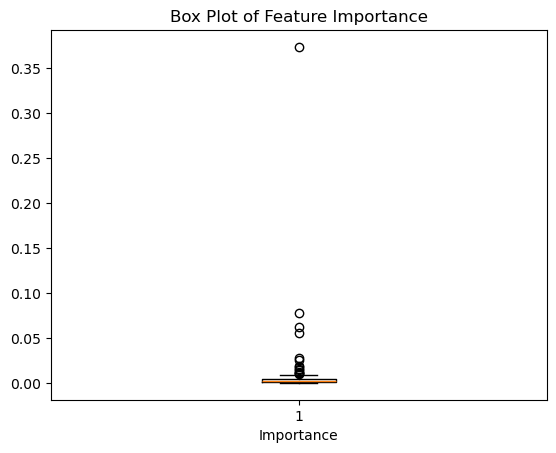

In [54]:
plt.boxplot(importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Box Plot of Feature Importance')
plt.show()

In [56]:
importance_df['Importance'].describe()    

count    134.000000
mean       0.007463
std        0.033492
min        0.000000
25%        0.000758
50%        0.001837
75%        0.004258
max        0.373425
Name: Importance, dtype: float64

In [58]:
# Remove under 25% of Importance
importance_threshold = importance_df['Importance'].quantile(q=0.25)
importance_df = importance_df[importance_df['Importance'] >= importance_threshold]

In [60]:
# Check the feature list
feature_list = importance_df['Feature'].unique()
feature_list

array(['TF71', 'TF3', 'SF17', 'TF24', 'SF10', 'TF87', 'TF95', 'TF58',
       'SF7', 'TF86', 'TF41', 'TF5', 'TF52', 'SF18', 'TF64', 'TF66',
       'TF59', 'TF43', 'TF13', 'TF25', 'TF94', 'TF50', 'SF1', 'TF7',
       'TF32', 'TF51', 'SF3', 'SF9', 'SF6', 'SF8', 'SF14', 'SF11', 'TF26',
       'TF63', 'TF33', 'SF5', 'SF16', 'SF2', 'TF42', 'SF4', 'SF15',
       'SF12', 'TF82', 'SF13', 'TF107', 'TF80', 'TF73', 'TF17', 'TF61',
       'TF109', 'TF21', 'TF9', 'TF23', 'TF85', 'TF115', 'TF16', 'TF65',
       'TF56', 'TF114', 'TF54', 'TF48', 'TF67', 'TF93', 'TF27', 'TF111',
       'TF90', 'TF110', 'TF60', 'TF68', 'TF38', 'TF70', 'TF116', 'TF18',
       'TF45', 'TF10', 'TF113', 'TF37', 'TF57', 'TF77', 'TF29', 'TF44',
       'TF14', 'TF74', 'TF40', 'TF22', 'TF103', 'TF11', 'TF102', 'TF62',
       'TF105', 'TF8', 'TF76', 'TF36', 'TF83', 'TF106', 'TF1', 'TF4',
       'TF55', 'TF91', 'TF78'], dtype=object)

In [62]:
# Feature Seperate
features_T = [feature for feature in feature_list if feature.startswith('T')]
features_S = [feature for feature in feature_list if feature.startswith('S')]

In [64]:
# Reinstate indicies
tasks = tasks.set_index('Task ID')
suppliers = suppliers.set_index('index')
suppliers.index.rename('Supplier ID', inplace=True)

In [66]:
# Select the features ahead of scaling
suppliers_selected = suppliers[features_S]
tasks_selected = tasks[features_T]

In [68]:
# Scaling
from sklearn.preprocessing import MinMaxScaler

In [70]:
scaler = MinMaxScaler()
tasks_selected[:] = scaler.fit_transform(tasks_selected)
suppliers_selected[:] = scaler.fit_transform(suppliers_selected)

/var/folders/9q/x_qkm_295r77cyh7zn22pj3h0000gn/T/ipykernel_1807/3546469203.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tasks_selected[:] = scaler.fit_transform(tasks_selected)
/var/folders/9q/x_qkm_295r77cyh7zn22pj3h0000gn/T/ipykernel_1807/3546469203.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.51937984 0.76744186 0.0620155  0.51937984 0.79844961 0.87596899
 0.05426357 0.05426357 0.05426357 0.86046512 0.05426357 0.01550388
 0.04651163 0.04651163 0.04651163 0.04651163 0.00775194 0.00775194
 0.8372093  0.03875969 0.68992248 0.03875969 0.         0.88372093
 0.7751938  0.8372093  0.26356589 0.17054264 0.10077519 0.10852713
 0.10852713 0.10077519 0.10077519 0.10

In [76]:
tasks_selected.head()

,TF71,TF3,TF24,TF87,TF95,TF58,TF86,TF41,TF5,TF52,...,TF8,TF76,TF36,TF83,TF106,TF1,TF4,TF55,TF91,TF78
Task ID,,,,,,,,,,,,,,,,,,,,,
T1,0.519380,0.824272,0.922770,0.358938,0.245745,0.880942,0.211647,0.873304,0.537396,0.201602,...,0.547051,0.428373,0.864608,0.240036,0.012123,0.470255,0.585825,0.425532,0.214215,1.000000
T2,0.767442,0.366460,0.383526,0.214764,0.270516,0.395101,0.127506,0.369500,0.271221,0.743036,...,0.393516,0.331980,0.679335,0.566123,0.326247,0.000000,0.420558,0.361702,0.616979,0.395780
T3,0.062016,0.682001,0.716395,0.192226,0.204648,0.661250,0.068460,0.664852,0.345707,0.355501,...,0.393516,0.179321,0.532067,0.209239,0.077844,0.664306,0.338932,0.553191,0.184600,0.552364
T4,0.519380,0.900150,1.000000,0.345486,0.212572,0.871388,0.186139,0.864197,0.374968,0.927228,...,0.563260,0.523177,0.869359,0.759058,0.267035,0.749292,0.670138,0.574468,0.826259,0.964061
T5,0.798450,0.296817,0.256127,0.114602,0.157559,0.322778,0.039803,0.307126,0.221725,0.559889,...,0.366952,0.149921,0.560570,0.283514,0.212840,0.000000,0.284851,0.340426,0.304047,0.174236


In [78]:
suppliers_selected.head()

Features,SF17,SF10,SF7,SF18,SF1,SF3,SF9,SF6,SF8,SF14,SF11,SF5,SF16,SF2,SF4,SF15,SF12,SF13
Supplier ID,,,,,,,,,,,,,,,,,,
S1,0.002,0.183673,0.666667,0.75,0.090909,0.473684,0.473684,0.090909,0.146341,0.473684,0.473684,0.090909,0.6,0.473684,0.090909,0.230769,0.571429,0.473684
S2,0.002,0.183673,0.0,0.75,0.090909,0.473684,0.473684,0.090909,0.146341,0.473684,0.473684,0.090909,0.6,0.473684,0.090909,0.230769,0.571429,0.473684
S3,0.0,0.183673,0.666667,0.75,0.090909,0.473684,0.473684,0.090909,0.146341,0.473684,0.473684,0.090909,0.6,0.473684,0.090909,0.230769,0.571429,0.473684
S4,0.1,0.183673,0.666667,0.75,0.090909,0.473684,0.473684,0.090909,0.146341,0.473684,0.473684,0.090909,0.6,0.473684,0.090909,0.230769,0.571429,0.473684
S5,0.3,0.183673,0.666667,0.0,0.0,0.0,0.0,0.090909,0.146341,0.0,1.0,1.0,0.6,0.473684,1.0,1.0,1.0,1.0


### 4. Best performing suppliers

In [80]:
# Top-performing
avg_cost = cost.groupby('Supplier ID')['Cost'].mean()
avg_cost.sort_values()
avg_cost.head(n=5)

Supplier ID
S1     0.443069
S10    0.403872
S11    0.401271
S12    0.415246
S13    0.407144
Name: Cost, dtype: float64

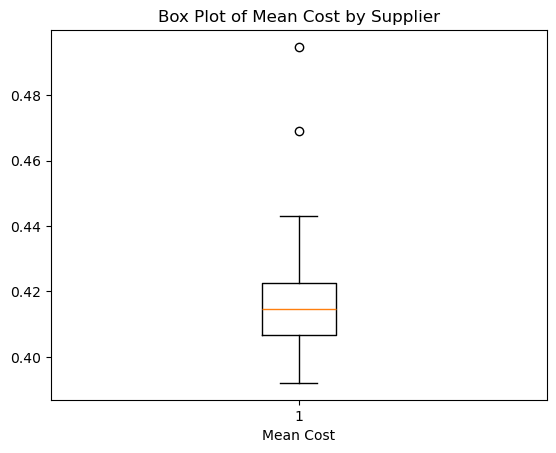

In [82]:
plt.boxplot(avg_cost)
plt.xlabel('Mean Cost')
plt.title('Box Plot of Mean Cost by Supplier')
plt.show()

In [84]:
# Worst-performing ((modifiable) Standard : 10%)
cost_threshold = avg_cost.quantile(q=0.95)
chosen_suppliers = avg_cost[avg_cost.values < cost_threshold]
suppliers_scaled_trimmed = suppliers_selected[suppliers.index.isin(chosen_suppliers.index)]

In [86]:
# Using this threshold, 4 suppliers were trimmed from the dataset
print('Suppliers removed:', len(suppliers)-len(suppliers_scaled_trimmed))

Suppliers removed: 4


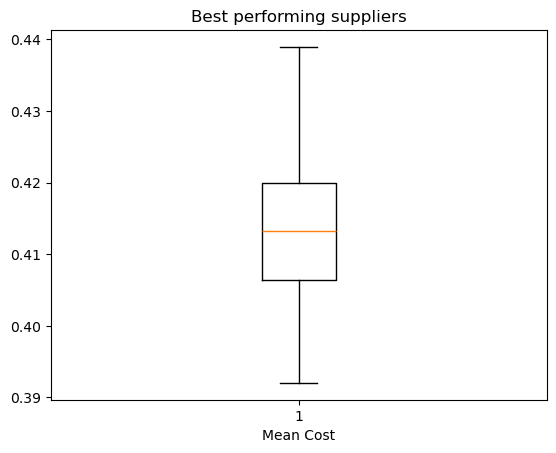

In [88]:
plt.boxplot(chosen_suppliers)
plt.xlabel('Mean Cost')
plt.title('Best performing suppliers')
plt.show()

### 5. Correlation Matrix between predictors

In [91]:
# Whole dataset:
cost_preprocessed = cost[cost['Supplier ID'].isin(chosen_suppliers.index)]
tasks_preprocessed = tasks_selected.reset_index()
suppliers_preprocessed = suppliers_scaled_trimmed.reset_index()

merged = tasks_preprocessed.merge(suppliers_preprocessed, how='cross')
dataset = merged.merge(cost_preprocessed, 
                       left_on=['Task ID','Supplier ID'],
                       right_on=['Task ID','Supplier ID'])

In [93]:
dataset.head()

,Task ID,TF71,TF3,TF24,TF87,TF95,TF58,TF86,TF41,TF5,...,SF14,SF11,SF5,SF16,SF2,SF4,SF15,SF12,SF13,Cost
0,T1,0.51938,0.824272,0.92277,0.358938,0.245745,0.880942,0.211647,0.873304,0.537396,...,0.473684,0.473684,0.090909,0.6,0.473684,0.090909,0.230769,0.571429,0.473684,0.384386
1,T1,0.51938,0.824272,0.92277,0.358938,0.245745,0.880942,0.211647,0.873304,0.537396,...,0.0,1.0,1.0,0.6,0.473684,1.0,1.0,1.0,1.0,0.427075
2,T1,0.51938,0.824272,0.92277,0.358938,0.245745,0.880942,0.211647,0.873304,0.537396,...,1.0,1.0,1.0,0.6,0.0,0.0,0.230769,0.0,0.0,0.386642
3,T1,0.51938,0.824272,0.92277,0.358938,0.245745,0.880942,0.211647,0.873304,0.537396,...,0.0,0.473684,0.090909,1.0,1.0,0.0,1.0,0.571429,1.0,0.392691
4,T1,0.51938,0.824272,0.92277,0.358938,0.245745,0.880942,0.211647,0.873304,0.537396,...,1.0,0.0,0.0,1.0,0.473684,0.090909,0.230769,0.571429,1.0,0.434512


In [95]:
X = dataset.drop(['Task ID','Supplier ID','Cost'], axis='columns')

In [97]:
# All predictors as numeric vectors:
X_numeric = X.apply(pd.to_numeric, errors='coerce')

In [99]:
# Task features (columns starting with 'TF')
task_features = X_numeric.filter(like='TF')

# Supplier features (columns starting with 'SF')
supplier_features = X_numeric.filter(like='SF')

In [101]:
correlation_matrix_tf = task_features.corr()
correlation_matrix_sf = supplier_features.corr()

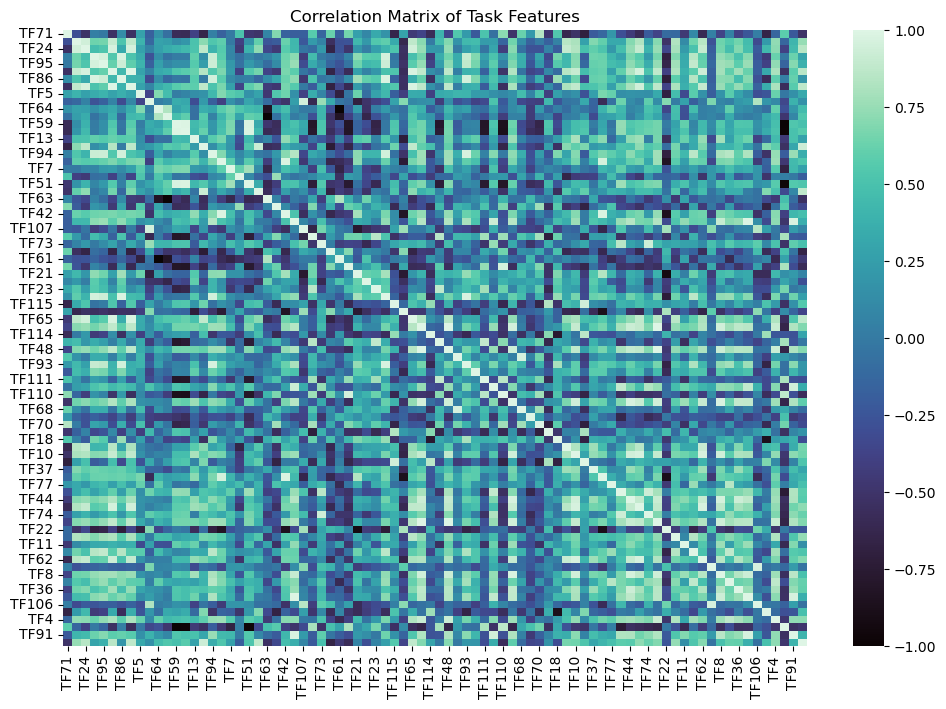

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_tf, cmap='mako', annot=False, fmt=".2f")
plt.title("Correlation Matrix of Task Features")
plt.show()

In [105]:
# We can change this:
upper_threshold = 0.8   
lower_threshold = -0.8  

# Compute the correlation matrix
corr_matrix = correlation_matrix_tf

# Extract the pairs that exceed thresholds
high_corr_pairs = [
    (feature1, feature2, corr_matrix.loc[feature1, feature2])
    for feature1 in corr_matrix.columns
    for feature2 in corr_matrix.columns
    if feature1 != feature2 and (corr_matrix.loc[feature1, feature2] > upper_threshold or corr_matrix.loc[feature1, feature2] < lower_threshold)
]

# Create a DataFrame of high correlation pairs
high_corr_table = pd.DataFrame(high_corr_pairs, columns=['Feature 1', 'Feature 2', 'Correlation'])

# Drop duplicate pairs (since correlation matrix is symmetric)
high_corr_table = high_corr_table.drop_duplicates(subset=['Correlation']).sort_values(by='Correlation', ascending=False)


In [107]:
# These are the high correlated predictors that we should drop:
high_corr_table.head()

,Feature 1,Feature 2,Correlation
187,TF56,TF40,0.999353
208,TF48,TF40,0.998891
182,TF56,TF48,0.998122
34,TF58,TF41,0.996090
132,TF82,TF83,0.990991


In [109]:
high_corr_table.info()

<class 'pandas.core.frame.DataFrame'>
Index: 223 entries, 187 to 86
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Feature 1    223 non-null    object 
 1   Feature 2    223 non-null    object 
 2   Correlation  223 non-null    float64
dtypes: float64(1), object(2)
memory usage: 7.0+ KB


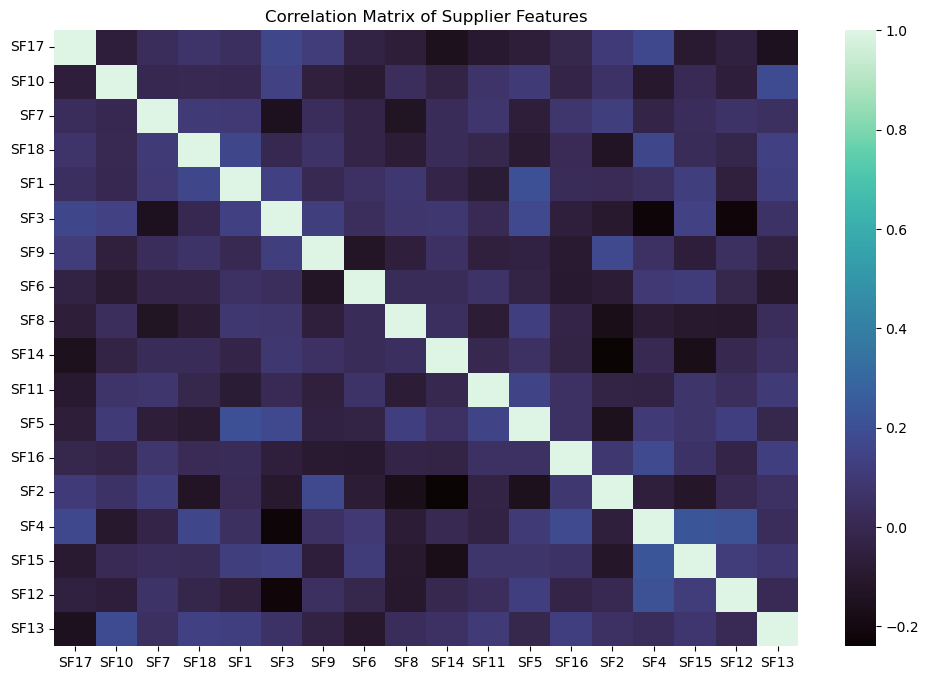

In [111]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_sf, cmap='mako', annot=False, fmt=".2f")
plt.title("Correlation Matrix of Supplier Features")
plt.show()

In [113]:
# Compute the correlation matrix
corr_matrix = correlation_matrix_sf

# Extract the pairs that exceed thresholds
high_corr_pairs = [
    (feature1, feature2, corr_matrix.loc[feature1, feature2])
    for feature1 in corr_matrix.columns
    for feature2 in corr_matrix.columns
    if feature1 != feature2 and (corr_matrix.loc[feature1, feature2] > upper_threshold or corr_matrix.loc[feature1, feature2] < lower_threshold)
]

# Create a DataFrame of high correlation pairs
high_corr_table = pd.DataFrame(high_corr_pairs, columns=['Feature 1', 'Feature 2', 'Correlation'])

# Drop duplicate pairs (since correlation matrix is symmetric)
high_corr_table = high_corr_table.drop_duplicates(subset=['Correlation']).sort_values(by='Correlation', ascending=False)

In [392]:
# No high correlated predictos for Suppliers Features
high_corr_table.head()

,Feature 1,Feature 2,Correlation
